# Zadanie 2
Wczytaj dane szeregu czasowego do struktury danych pandas. Wyświetl kilka pierwszych
wierszy danych oraz sprawdź ich typy. Zidentyfikuj i obsłuż brakujące wartości danych.
Przeprowadź podstawową analizę szeregu czasowego, w tym wizualizację danych (np. wykres czasowy) oraz obliczenie podstawowych statystyk opisowych (średnia, odchylenie standardowe, minimum, maksimum).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels as sts

In [18]:
# Pobranie danych z yahoo finance i wstawienie do pandas dataframe
data = yf.download('META', start='2015-01-01', end='2024-01-01')
# Nazwy kolumn tworzymy na podstawie pierwszego rekordu
data = data.reset_index()
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Utworzenie kompletnego zakresu dat od pierwszej do ostatniej daty w danych
complete_date_range = pd.date_range(start=data['Date'].min(), end=data['Date'].max(), freq='D')

# Utworzenie DataFrame z kompletnym zakresem dat
complete_data = pd.DataFrame({'Date': complete_date_range})
# Połączenie danych z kompletnym zakresem dat
data = pd.merge(complete_data, data, on='Date', how='left')
data['Close'] = data['Close'].interpolate(method="linear")
data.set_index('Date', inplace=True)
data.head()


[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2015-01-02,78.449997
2015-01-03,78.029999
2015-01-04,77.610001
2015-01-05,77.190002
2015-01-06,76.150002


In [19]:
data.dtypes

Close    float64
dtype: object

Obliczenie podstawowych statystyk opisowych (średnia, odchylenie standardowe, minimum, maksimum).

In [20]:
# Średnia
data['Close'].mean()

190.1048325586261

In [21]:
# Odchylenie Standarodwe
data['Close'].std()

76.38322938322652

In [22]:
# Minimum
data['Close'].min()

74.05000305175781

In [23]:
# Maksimum
data['Close'].max()

382.17999267578125

Obliczenie podstawowych statystyk opisowych (średnia, odchylenie standardowe, minimum, maksimum) dla miesięcy oraz wyświetlenie na wykresie

Średnia wartość miesięczna:
Date
2015-01-31     76.753111
2015-02-28     76.830595
2015-03-31     81.034840
2015-04-30     82.076000
2015-05-31     79.461452
                 ...    
2023-08-31    299.379357
2023-09-30    300.926610
2023-10-31    310.819569
2023-11-30    329.145001
2023-12-31    338.747241
Freq: M, Name: Close, Length: 108, dtype: float64

Średnia ruchoma:
Date
2015-01-02           NaN
2015-01-03           NaN
2015-01-04           NaN
2015-01-05           NaN
2015-01-06           NaN
                 ...    
2023-12-25    349.361000
2023-12-26    351.028665
2023-12-27    352.672997
2023-12-28    354.042998
2023-12-29    354.402998
Name: Close, Length: 3284, dtype: float64

Długość sekwencji: 3284

Różnice między kolejnymi wartościami:
Date
2015-01-02         NaN
2015-01-03   -0.419998
2015-01-04   -0.419998
2015-01-05   -0.419998
2015-01-06   -1.040001
                ...   
2023-12-25    0.359993
2023-12-26    0.359993
2023-12-27    3.000000
2023-12-28    0.490021
202

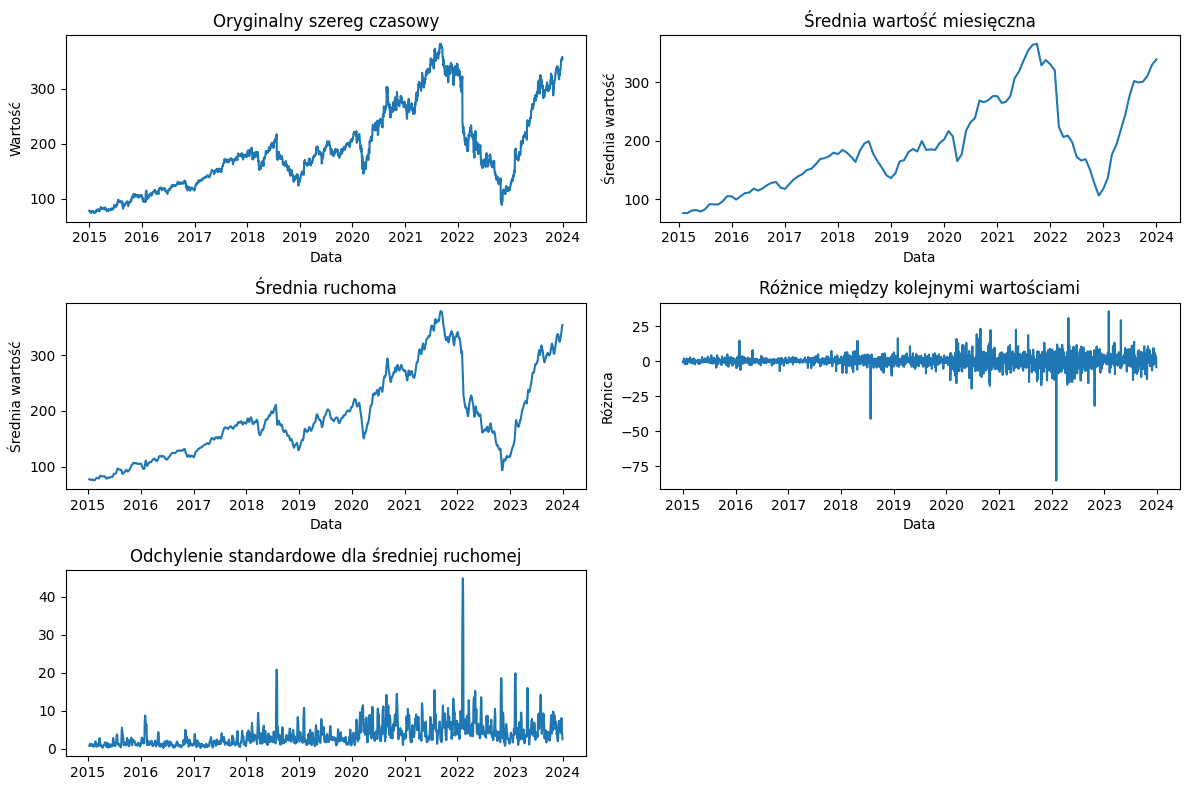

In [24]:
# Ekstrakcja cech czasowych
#
ts = data['Close']
seasonality = ts.resample('M').mean() # Średnia wartość miesięczna
trend = ts.rolling(window=10).mean() # Średnia ruchoma
sequence_length = len(ts) # Długość sekwencji
differences = ts.diff() # Różnice między kolejnymi wartościami
variability = ts.rolling(window=10).std() # Odchylenie standardowe dla średniej ruchomej
# Wyświetlenie wyników
print("Średnia wartość miesięczna:")
print(seasonality)
print("\nŚrednia ruchoma:")
print(trend)
print("\nDługość sekwencji:", sequence_length)
print("\nRóżnice między kolejnymi wartościami:")
print(differences)
print("\nOdchylenie standardowe dla średniej ruchomej:")
print(variability)
# Rysowanie wyników
plt.figure(figsize=(12, 8))
# Wykres oryginalnego szeregu czasowego
plt.subplot(3, 2, 1)
plt.plot(ts)
plt.title('Oryginalny szereg czasowy')
plt.xlabel('Data')
plt.ylabel('Wartość')
# Wykres średniej wartości miesięcznej (sezonowość)
plt.subplot(3, 2, 2)
plt.plot(seasonality)
plt.title('Średnia wartość miesięczna')
plt.xlabel('Data')
plt.ylabel('Średnia wartość')
# Wykres średniej ruchomej (trend)
plt.subplot(3, 2, 3)
plt.plot(trend)
plt.title('Średnia ruchoma')
plt.xlabel('Data')
plt.ylabel('Średnia wartość')
# Wykres różnic między kolejnymi wartościami
plt.subplot(3, 2, 4)
plt.plot(differences)
plt.title('Różnice między kolejnymi wartościami')
plt.xlabel('Data')
plt.ylabel('Różnica')
# Wykres odchylenia standardowego dla średniej ruchomej (zmienność w czasie)
plt.subplot(3, 2, 5)
plt.title('Odchylenie standardowe dla średniej ruchomej')
plt.tight_layout()
plt.plot(variability)